# Naive bayes regression

Naive Bayes regression classifier is a type of ML algorithm based on the Bayes theorem conditional probability for prediction and is considered to be more accurate than other sophisticated algorithms such as univariate decision trees.

### Guassian Naive Bayes Regression

(Gaussian) Naive Bayes assumes that each class follow a Gaussian distribution.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, GaussianNB, ComplementNB, CategoricalNB, MultinomialNB

In [3]:
dataset = pd.read_csv("cancer.csv")

In [4]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
dataset = dataset.drop(["id"], axis = 1)

In [7]:
dataset = dataset.drop(["Unnamed: 32"], axis = 1)

Visualization

In [8]:
M = dataset[dataset.diagnosis == "M"]
B = dataset[dataset.diagnosis == "B"]

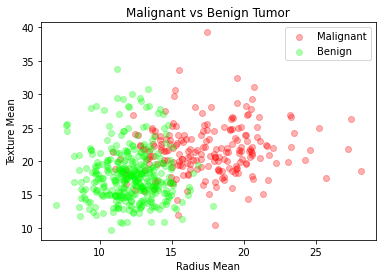

In [9]:
plt.title("Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

In [10]:
dataset.diagnosis = [1 if i == "M" else 0 for i in dataset.diagnosis]

x = dataset.drop(["diagnosis"], axis = 1)
y = dataset.diagnosis.values

In [11]:
# Normalization:
x = (x - np.min(x)) / (np.max(x) - np.min(x))

/home/devangm/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/devangm/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [14]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_test, y_test)

0.935672514619883

### Bernoulli Naive Bayes Regression

Bernoulli Naive Bayes is one of the variants of the Naive Bayes algorithm in machine learning. It is very useful to be used when the dataset is in a binary distribution where the output label is present or absent. The main advantage of this algorithm is that it only accepts features in the form of binary values such as:

True or False
Spam or Ham
Yes or No
0 or 1

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/SMS-Spam-Detection/master/spam.csv", encoding= 'latin-1')
data = data[["class", "message"]]

In [4]:
x = np.array(data["message"])
y = np.array(data["class"])

In [5]:
cv = CountVectorizer() # CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary
x = cv.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

model = BernoulliNB(binarize=0.0)
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9782490483958673

### Categorical Naive Bayes

It is suitable for classification with discrete features which assumes categorically distribution for each feature. The features should to encoded using label encoding  techniques such that each category would be mapped to a unique number.

In [8]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import f1_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [9]:
sns.set()
warnings.filterwarnings('ignore')

In [10]:
url= 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
car_df = pd.read_csv(url, names=['buying','maint','doors','persons','lug_boot','safety','class'], sep=",")

car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [11]:
car_df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [12]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:
car_df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [14]:
car_df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [15]:
features = car_df.columns.tolist()
features.remove('class')

encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(car_df[features])
car_df_encoded = pd.DataFrame(data_encoded, columns=features)
data_encoded

array([[3., 3., 0., 0., 2., 1.],
       [3., 3., 0., 0., 2., 2.],
       [3., 3., 0., 0., 2., 0.],
       ...,
       [1., 1., 3., 2., 0., 1.],
       [1., 1., 3., 2., 0., 2.],
       [1., 1., 3., 2., 0., 0.]])

In [16]:
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(car_df['class'])
car_df_encoded['class'] = target_encoded
encoder.inverse_transform(target_encoded)

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'good', 'vgood'],
      dtype=object)

In [17]:
car_df_encoded.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,1.0,2
1,3.0,3.0,0.0,0.0,2.0,2.0,2
2,3.0,3.0,0.0,0.0,2.0,0.0,2
3,3.0,3.0,0.0,0.0,1.0,1.0,2
4,3.0,3.0,0.0,0.0,1.0,2.0,2


Multicollinearity Resolution

In [18]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(car_df_encoded.values, i) for i in range(len(features))]
vif["Features"] = features
vif

,VIF,Features
0,2.537474,buying
1,2.522938,maint
2,2.443242,doors
3,2.165404,persons
4,2.290247,lug_boot
5,2.240569,safety


In [19]:
X_train, X_test, y_train, y_test = train_test_split(car_df_encoded.drop('class', axis=1), car_df_encoded['class'], test_size=0.3, random_state=143)

In [20]:
cnb = CategoricalNB()
cnb.fit(X_train, y_train)

CategoricalNB()

In [21]:
y_pred_cnb = cnb.predict(X_test)
y_prob_pred_cnb = cnb.predict_proba(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred_cnb).sum()
count_misclassified

82

In [22]:
classification_report(y_test, y_pred_cnb)

'              precision    recall  f1-score   support\n\n           0       0.63      0.69      0.66       114\n           1       0.56      0.20      0.29        25\n           2       0.92      0.97      0.94       358\n           3       0.86      0.27      0.41        22\n\n    accuracy                           0.84       519\n   macro avg       0.74      0.53      0.58       519\nweighted avg       0.84      0.84      0.83       519\n'

# Complement NB

Complement Naive Bayes is particularly suited to work with imbalanced datasets. In complement Naive Bayes, instead of calculating the probability of an item belonging to a certain class, we calculate the probability of the item belonging to all the classes. This is the literal meaning of the word, complement and hence is called Complement Naive Bayes.

In [23]:
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score

In [24]:
# Loading the dataset 
dataset = load_wine()
X = dataset.data
y = dataset.target

In [26]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
  
# Creating and training the Complement Naive Bayes Classifier
classifier = ComplementNB()
classifier.fit(X_train, y_train)

ComplementNB()

In [27]:
# Evaluating the classifier
prediction = classifier.predict(X_test)
prediction_train = classifier.predict(X_train)

In [28]:
accuracy_score(y_train, prediction_train) * 100

65.56291390728477

In [29]:
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.64      1.00      0.78         9\n           1       0.67      0.73      0.70        11\n           2       1.00      0.14      0.25         7\n\n    accuracy                           0.67        27\n   macro avg       0.77      0.62      0.58        27\nweighted avg       0.75      0.67      0.61        27\n'

# Multinomial NB

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [30]:
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
clf = MultinomialNB()
clf.fit(X,y)
clf.predict(X[2:3])

array([3])